In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data=pd.read_csv('mnist_test.csv')

In [ ]:
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6900,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6901,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6902,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6903,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev=X_dev/255

In [ ]:
data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train=X_train/255
_,m_train=X_train.shape

In [ ]:
Y_train

array([5., 1., 3., ..., 0., 7., 8.])

In [ ]:
import numpy as np

def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z, 0)

def softmax(z):
  A = np.exp(z) / sum(np.exp(z))
  return A

def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

def ReLU_deriv(Z):
  return Z > 0

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, int(Y.max() + 1)))
  one_hot_Y[np.arange(Y.size), Y.astype(int)] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
  dW1 = 1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1)
  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
  return np.argmax(A2,0)

def get_accuracy(predictions,Y):
  print(predictions,Y)
  return np.sum(predictions==Y)/Y.size

def gradient_descent(X,Y,alpha,iterations):
  W1,b1,W2,b2=init_params()
  for i in range(iterations):
    Z1,A1,Z2,A2=forward_prop(W1,b1,W2,b2,X)
    dW1,db1,dW2,db2=backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
    W1,b1,W2,b2=update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
    if i%10==0:
      print("Iteration: ",i)
      predictions=get_predictions(A2)
      print(get_accuracy(predictions,Y))

  return W1,b1,W2,b2


In [ ]:
def ReLU_deriv(Z1):
    return Z>0

In [ ]:
W1,b1,W2,b2=gradient_descent(X_train,Y_train,0.10,500)

Iteration:  0
[4 8 7 ... 3 7 3] [5. 1. 3. ... 0. 7. 8.]
0.09060118543607112
Iteration:  10
[8 8 8 ... 3 7 3] [5. 1. 3. ... 0. 7. 8.]
0.15055038103302287
Iteration:  20
[5 8 8 ... 0 7 3] [5. 1. 3. ... 0. 7. 8.]
0.2045723962743438
Iteration:  30
[5 8 3 ... 0 7 3] [5. 1. 3. ... 0. 7. 8.]
0.26147332768839965
Iteration:  40
[5 1 3 ... 0 7 3] [5. 1. 3. ... 0. 7. 8.]
0.3127857747671465
Iteration:  50
[5 1 3 ... 0 7 1] [5. 1. 3. ... 0. 7. 8.]
0.3754445385266723
Iteration:  60
[5 1 3 ... 0 7 1] [5. 1. 3. ... 0. 7. 8.]
0.4235393734123624
Iteration:  70
[5 1 3 ... 0 7 1] [5. 1. 3. ... 0. 7. 8.]
0.46164267569856055
Iteration:  80
[5 1 3 ... 0 7 1] [5. 1. 3. ... 0. 7. 8.]
0.49839119390347164
Iteration:  90
[5 1 3 ... 0 7 1] [5. 1. 3. ... 0. 7. 8.]
0.527688399661304
Iteration:  100
[5 1 3 ... 0 7 1] [5. 1. 3. ... 0. 7. 8.]
0.5593564775613886
Iteration:  110
[5 1 3 ... 0 7 3] [5. 1. 3. ... 0. 7. 8.]
0.5878069432684166
Iteration:  120
[5 1 3 ... 0 7 3] [5. 1. 3. ... 0. 7. 8.]
0.6137171888230313
Iterat

In [ ]:
def make_prediction(X,W1,b1,W2,b2):
  _,_,_,A2=forward_prop(W1,b1,W2,b2,X)
  predictions=get_predictions(A2)
  return predictions


def test_predictions(index,W1,b1,W2,b2):
  current_image=X_train[:,index,None]
  prediction=make_prediction(X_train[:,index,None],W1,b1,W2,b2)
  label=Y_train[index]
  print("Prediction: ",prediction)
  print("Label: ",label)
  current_image=current_image.reshape((28,28))*255
  plt.gray()
  plt.imshow(current_image,interpolation='nearest')
  plt.show()

Prediction:  [6]
Label:  6.0


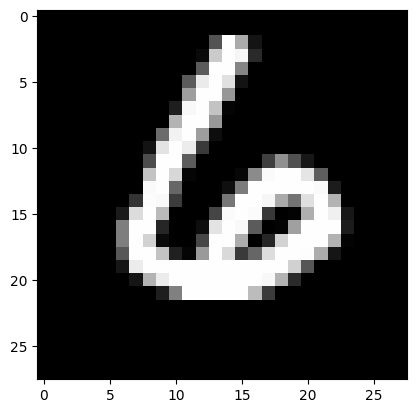

Prediction:  [9]
Label:  9.0


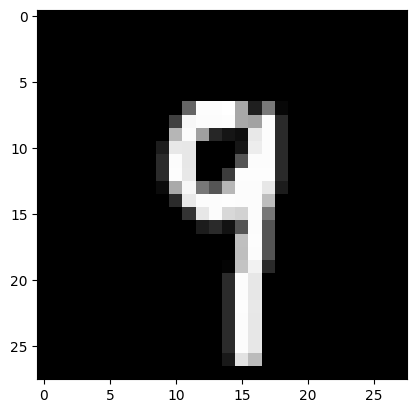

Prediction:  [0]
Label:  0.0


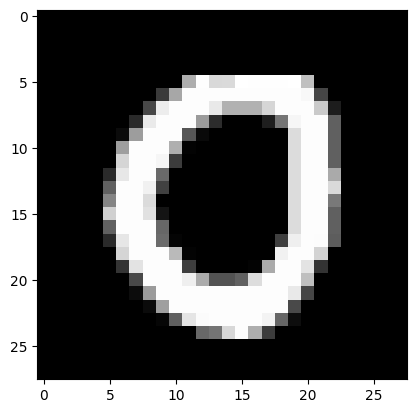

Prediction:  [5]
Label:  0.0


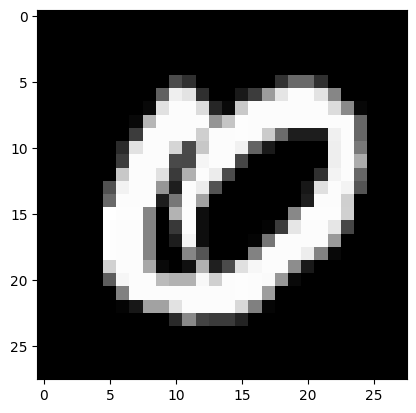

In [ ]:
test_predictions(51,W1,b1,W2,b2)
test_predictions(21,W1,b1,W2,b2)
test_predictions(10,W1,b1,W2,b2)
test_predictions(15,W1,b1,W2,b2)
